In [1]:
# importing neccesary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')



from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.compose import ColumnTransformer

In [3]:
# loading and preping the data
col_names = [
             'class', 'cap_shape', 'cap_surface', 'cap_color', 'bruise?', 'odor',
            'gill attachment', 'gill spacing', 'gill size', 'gill color', 'stalk shape',
            'stalk root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
             'stalk-color-above-ring',' stalk-color-below-ring', 'veil-type', 
             'veil color', 'ring number', 'ring type', 'spore-print-color', 
             'population', 'habitat'
            ]

class_ = {'p': 'poisonous' , 'e':'edible'}
cap_shape = {'b':'bell','c': 'conical','x':'convex','f':'flat',"k": "knobbed","s":'sunken'}
cap_surf = {"f":'fibrous',"g":'grooves:',"y":'scaly',"s":'smooth'}

cap_col = {"n":'brown',"b":'buff',"c":'cinnamon',"g":'gray',"r":'green',
                                  "p":'pink',"u":'purple',"e":'red',"w":'white',"y":'yellow'}
brui = {"t":'bruises',"f":'no'}
od = {"a":'almond',"l":'anise',"c":'creosote',"y":'fishy',"f":'foul',
                                  "m":'musty',"n":'none',"p":'pungent',"s":'spicy'}

gil_attch = {"a":'attached',"d":'descending',"f":'free',"n":'notched'}
gill_sp = {"c":'close',"w":'crowded',"d":'distant'}
gill_siz = {"b":'broad',"n":'narrow'}

gil_col = {"k":'black',"n":'brown',"b":'buff',"h":'chocolate',"g":'gray',
                                  "r":'green',"o":'orange',
                                "p":'pink',"u":'purple',"e":'red',
                                  "w":'white',"y":'yellow'}
stalk_shape = {"e":'enlarging',"t":'tapering'}
stalk_root = {"b": 'bulbous',"c":'club',"u":'cup',"e":'equal',
                                  "z":'rhizomorphs',"r":'rooted',"?":'missing'}
ssar = {"f":'fibrous',"y":'scaly',"k":'silky',"s":'smooth'}
ssbr = {"f":'fibrous',"y":'scaly',"k":'silky',"s":'smooth'}
scar = {"n":'brown',"b":'buff',"c":'cinnamon',"g":'gray',"o":'orange',
                                  "p":'pink',"e":'red',"w":'white',"y":'yellow'}

sbar = {"n":'brown',"b":'buff',"c":'cinnamon',"g":'gray',"o":'orange',
                                  "p":'pink',"e":'red',"w":'white',"y":'yellow'}

veil_typ = {"p": 'partial',"u":'universal'}
veil_col = {"n":'brown',"o":'orange',"w":'white',"y":'yellow'}
ring_num = {"n":'none',"o":'one',"t":'two'}

ring_type = {"c":'cobwebby',"e":'evanescent',"f":'flaring',"l":'large',
                                  "n":'none',"p":'pendant',"s":'sheathing',"z":'zone'}

spc = {"k":'black',"n":'brown',"b":'buff',"h":'chocolate',"r":'green',
                                  "o":'orange',"u":'purple',"w":'white',"y":'yellow'}

pop = {"a":'abundant',"c":'clustered',"n":'numerous',
                                  "s":'scattered',"v":'several',"y":'solitary'}

hab = {'g':'grasses','l':'leaves',"m":'meadows',"p":'paths',
                                 "u": 'urban',"w":'waste',"d":'woods'}

new_names = [class_, cap_shape, cap_surf, cap_col, brui, od, gil_attch, gill_sp, gill_siz, gil_col,
            stalk_shape, stalk_root, ssar, ssbr, scar, sbar, veil_typ, veil_col, ring_num, ring_type,
            spc, pop, hab]

p = 'data/agaricus-lepiota.csv'
data = pd.read_csv(p, header=None)
data.columns = col_names
data.head()
data1 = data.copy()

In [4]:
data1.head()

,class,cap_shape,cap_surface,cap_color,bruise?,odor,gill attachment,gill spacing,gill size,gill color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil color,ring number,ring type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
for col, name in zip(col_names,new_names):
    data1[col] = data1[col].replace(name)  

In [6]:
data1.head()

,class,cap_shape,cap_surface,cap_color,bruise?,odor,gill attachment,gill spacing,gill size,gill color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil color,ring number,ring type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


# Data Analysis Phase

In [10]:
# checking for missing values
data1.isnull().sum()

class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruise?                     0
odor                        0
gill attachment             0
gill spacing                0
gill size                   0
gill color                  0
stalk shape                 0
stalk root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
 stalk-color-below-ring     0
veil-type                   0
veil color                  0
ring number                 0
ring type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
# summary statistics of the dataset
data1.describe().T

,count,unique,top,freq
class,8124,2,edible,4208
cap_shape,8124,6,convex,3656
cap_surface,8124,4,scaly,3244
cap_color,8124,10,brown,2284
bruise?,8124,2,no,4748
odor,8124,9,none,3528
gill attachment,8124,2,free,7914
gill spacing,8124,2,close,6812
gill size,8124,2,broad,5612
gill color,8124,12,buff,1728


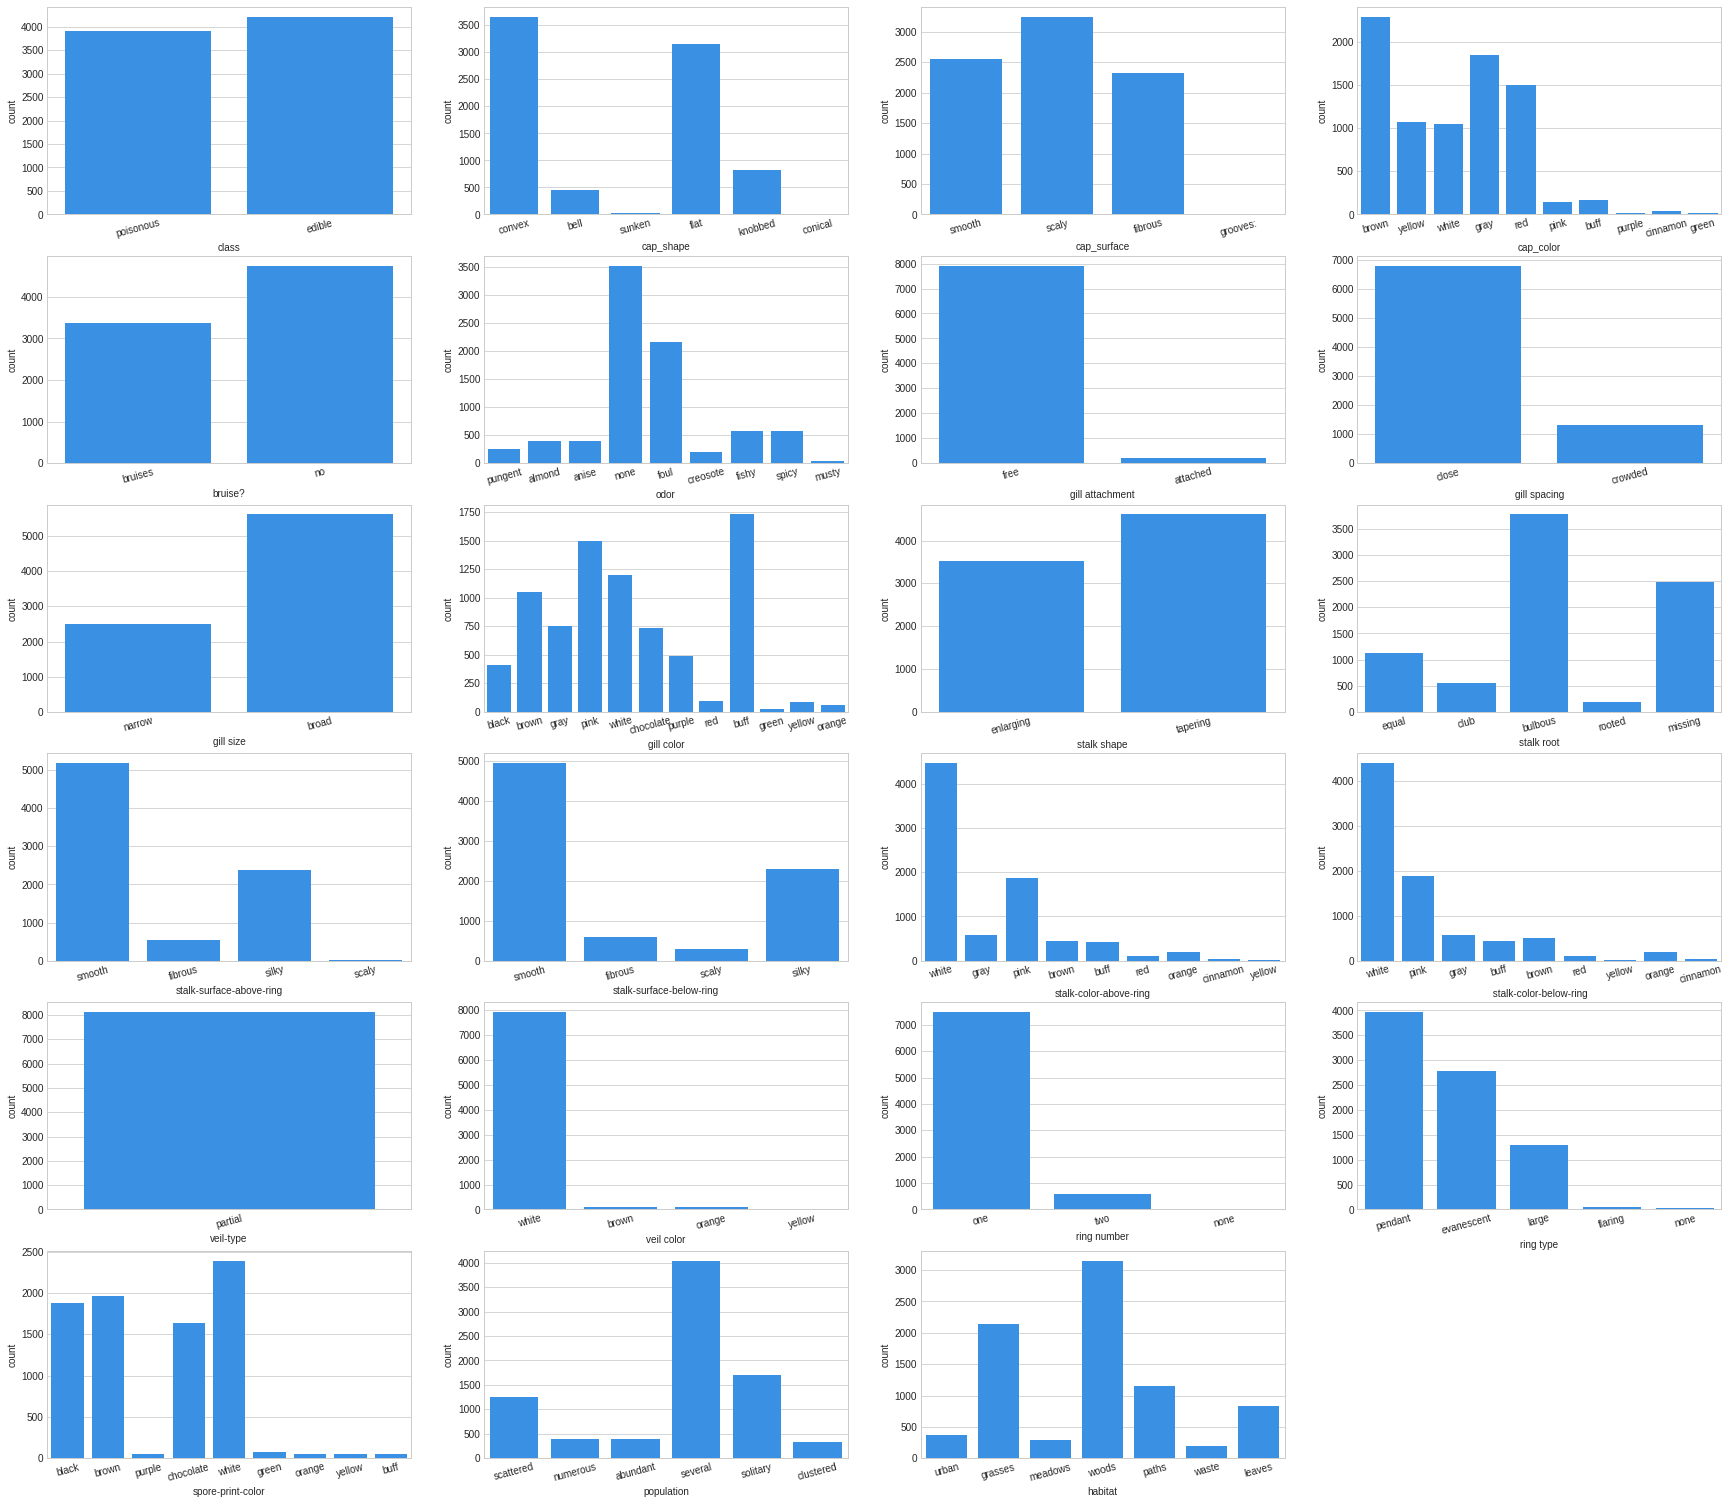

In [12]:
# checking the nature of the data using visualization
plt.figure(figsize= (30, 45))

for index, col in enumerate(col_names):
    plt.subplot(10, 4, index+1)
    sns.countplot(data1[col], color= 'dodgerblue')
    plt.xticks(rotation=15)

In [13]:
data1['class'].value_counts()

edible       4208
poisonous    3916
Name: class, dtype: int64

In [15]:
data1['class'].value_counts(normalize = True).round(2)

edible       0.52
poisonous    0.48
Name: class, dtype: float64

The figure above shows the counts of each feature in the dataset.
* The data contains only **partial** in the veil type chart, none of **universal** was recorded.<br>
* We can also notice that white veil color was the most dominant of them all.<br>

Luckly, the **class** feature is well balanced, making it easy for any classifier to generalize the data well without any bias, and we do not need any boosting algorithm for this type of problem.

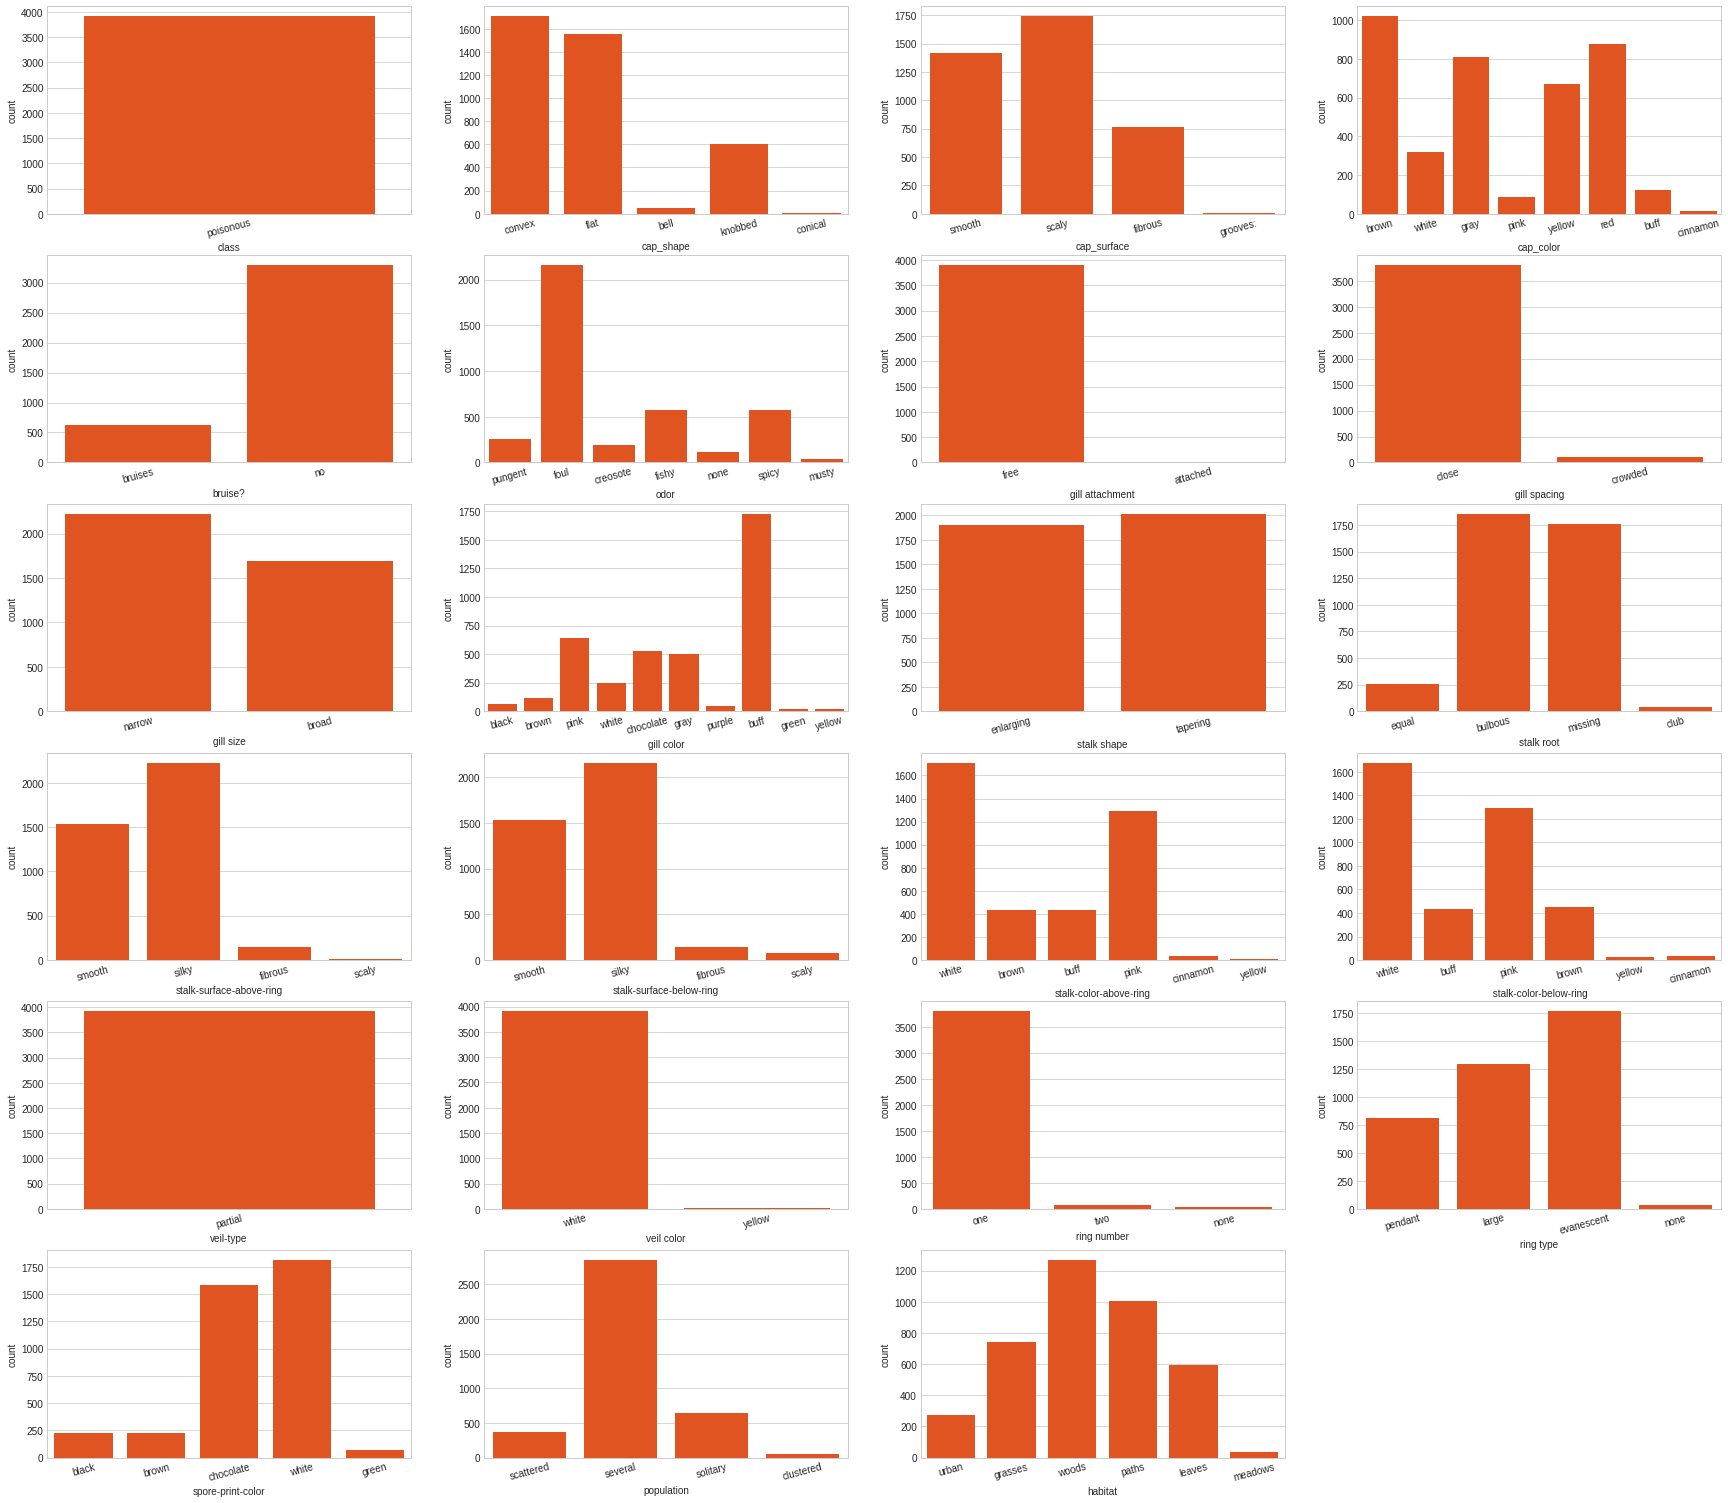

In [16]:
# looking at the poisonous mushroom only
poi = data1[data1['class'] == 'poisonous']

plt.figure(figsize= (30, 45))

for index, col in enumerate(col_names):
    plt.subplot(10, 4, index+1)
    sns.countplot(poi[col], color= 'orangered')
    plt.xticks(rotation=15)

The counts features for the poisonous mushrooms only is not that significant from the edible ones.<br> 
Except that:
* The count of bruised poisonous mushrooms is lower than that of the edible mushrooms.
* Most of the poisonous mushrooms have foul odor as compared to the edible ones.
* Gill spacing of the poisonous mushrooms is less crowded than the gill spacing of the edible mushrooms in most cases.
* Most gill color of the poisonous mushrooms have **buff** color.

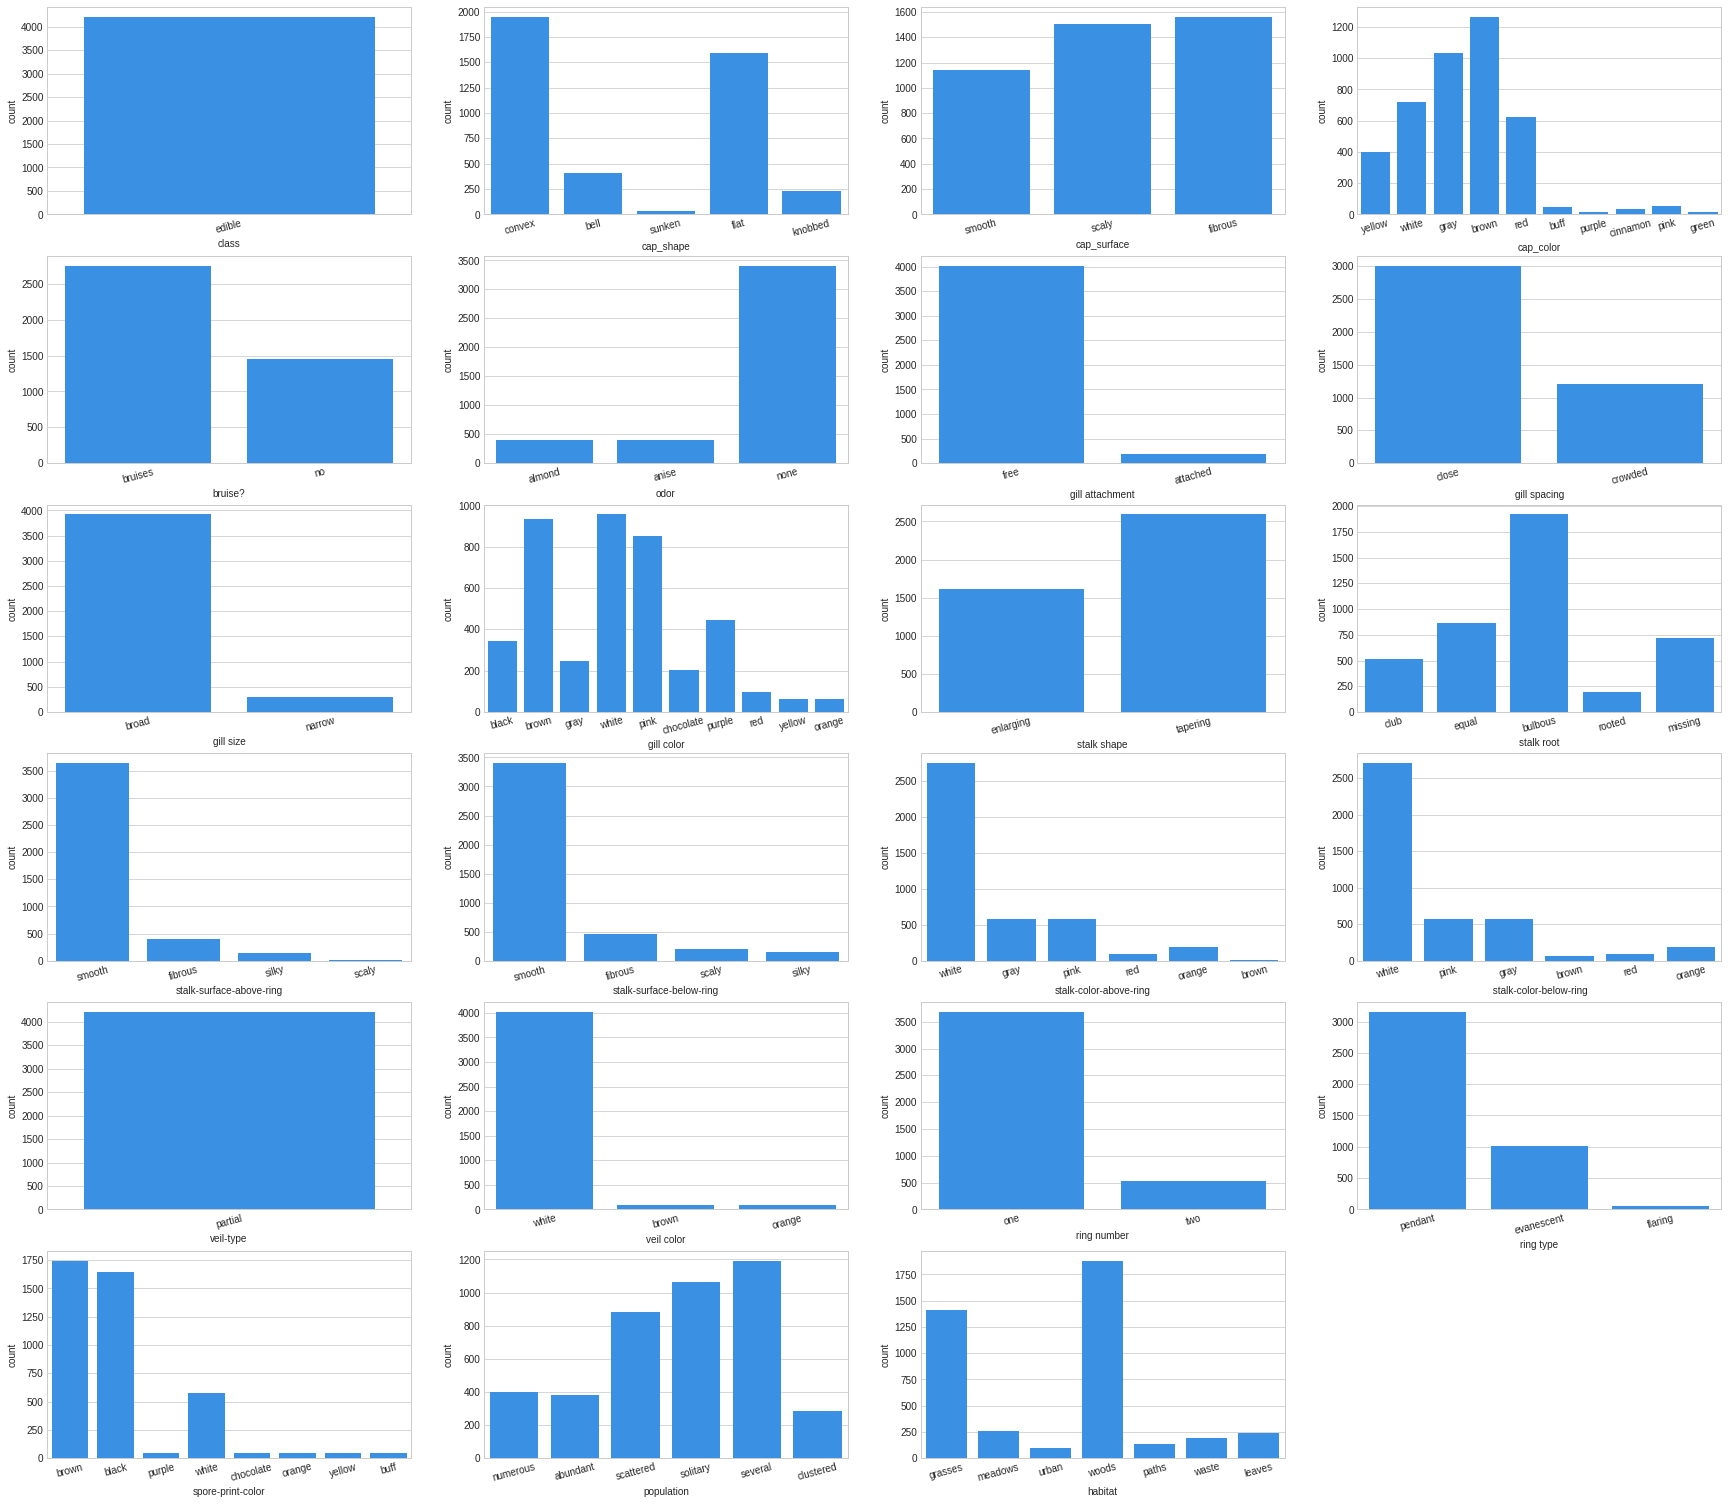

In [17]:
# loooking at the edible mushrooms
edi = data1[data1['class'] == 'edible']

plt.figure(figsize= (30, 45))

for index, col in enumerate(col_names):
    plt.subplot(10, 4, index+1)
    sns.countplot(edi[col], color= 'dodgerblue')
    plt.xticks(rotation=15)

Most observations of the edible mushrooms is quite the opposite of that of the poisonous ones.
See that:
* The count of bruised edible mushrooms is higher than that of the poisonous mushrooms.
* Most of the edible mushrooms do not have any distinct odor.
* Gill spacing of the edible mushrooms is more crowded than the gill spacing of the poisonous mushrooms.
* Most of the gill color of the edible mushrooms have **black, brown and white** color.

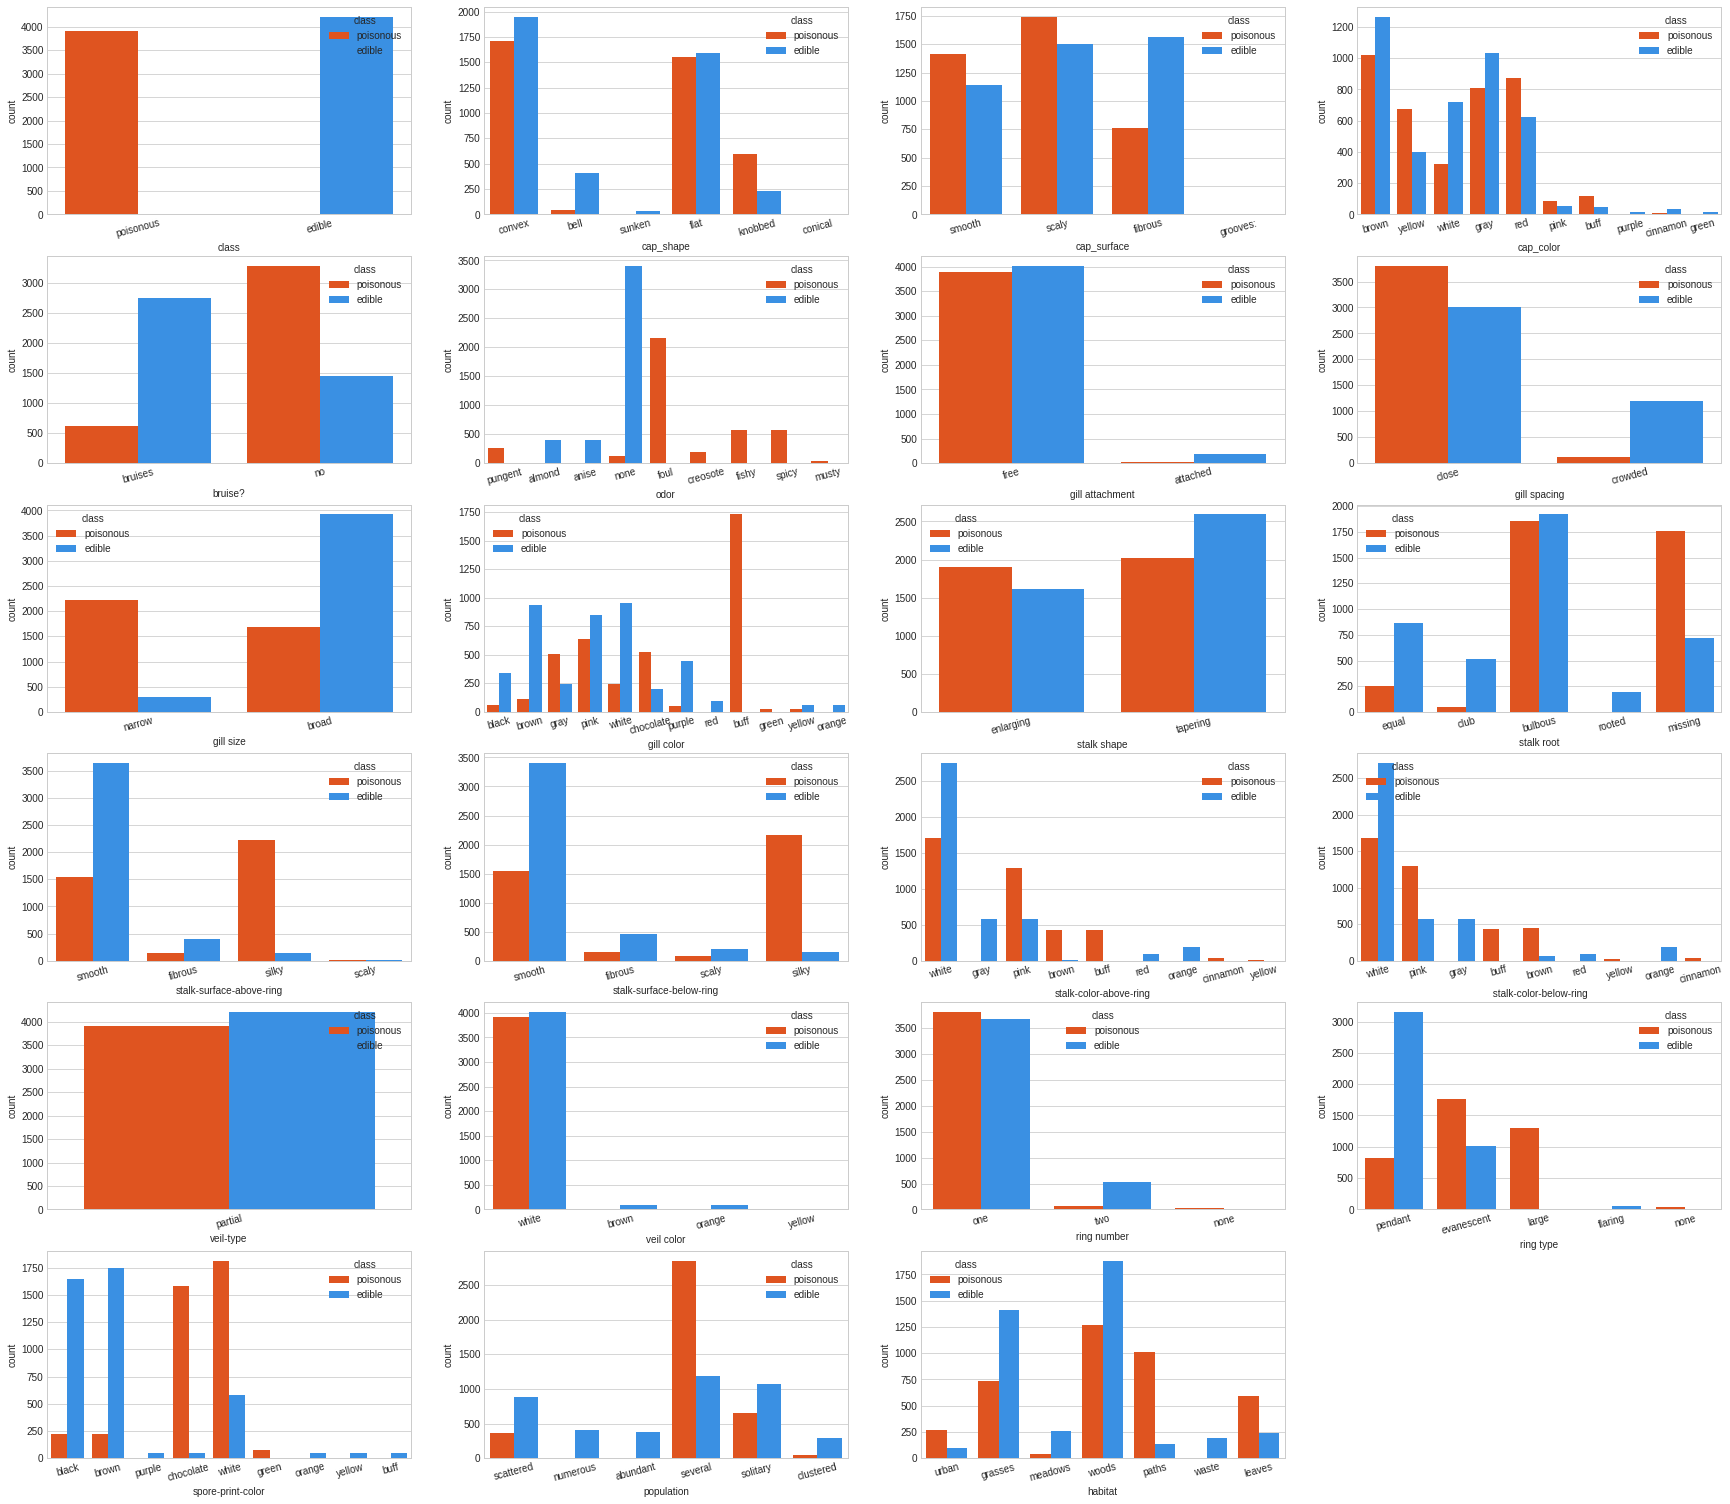

In [18]:
# looking for associations and relationships
plt.figure(figsize= (30, 45))

for index, col in enumerate(col_names):
    plt.subplot(10, 4, index+1)
    sns.countplot(x = data1[col], hue= 'class', palette= ['orangered', 'dodgerblue'], data= data1)
    plt.xticks(rotation=15)

In [ ]:
"""
Pandas profiling a quick exploratory data analysis of the data we are working with.
"""
import pandas_profiling
profile= pandas_profiling.ProfileReport(data1)

# the output is saved as an html file in the current directory.
profile.to_file('mushroom_data_profiling.html') 

In [19]:
print(pd.crosstab(  data1['habitat'],  data1['class']))

class    edible  poisonous
habitat                   
grasses    1408        740
leaves      240        592
meadows     256         36
paths       136       1008
urban        96        272
waste       192          0
woods      1880       1268


In [20]:
print(pd.crosstab( data1['cap_shape'], data1['class'] ))

class      edible  poisonous
cap_shape                   
bell          404         48
conical         0          4
convex       1948       1708
flat         1596       1556
knobbed       228        600
sunken         32          0


See that not all convexed shape mushrooms are edible, and not all flatten mushrooms are edible too.

In [21]:
# gill attachement
print(pd.crosstab(  data1['gill attachment'], data1['class']))

class            edible  poisonous
gill attachment                   
attached            192         18
free               4016       3898


In [22]:
# gill color
print(pd.crosstab(  data1['gill color'], data1['class']))

class       edible  poisonous
gill color                   
black          344         64
brown          936        112
buff             0       1728
chocolate      204        528
gray           248        504
green            0         24
orange          64          0
pink           852        640
purple         444         48
red             96          0
white          956        246
yellow          64         22


**Black, brown** color of mushrooms being edible is not that right all the time either.

In [23]:
data1['class'].unique()

array(['poisonous', 'edible'], dtype=object)

In [24]:
# smell
print(pd.crosstab( data1['odor'], data1['class']))

class     edible  poisonous
odor                       
almond       400          0
anise        400          0
creosote       0        192
fishy          0        576
foul           0       2160
musty          0         36
none        3408        120
pungent        0        256
spicy          0        576


It looks like our generalization about the **almond** scented mushrooms being edible is right.

<font size= 4.5pt>Conclusion:</font><br>
Even though, we can make an effort using inference to determine whether a mushroom is edible or not. They can't always be true. But with the existence of past data collected, we could feed these data to a machine learning model to do the generalization for us with good accuracy/precision/recall, whatever metrics we will be using.

# Model Building Phase

In [7]:
# we will be using a copy of data1 (as data2) to build the ML model

data2 = data1.copy()

In [8]:
data2.head()

,class,cap_shape,cap_surface,cap_color,bruise?,odor,gill attachment,gill spacing,gill size,gill color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil color,ring number,ring type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [10]:
X, y = data2.iloc[:, 1:], data2.iloc[:, 0] 

In [11]:
# starting simple...
# In other to feed the feed the data to the ML model we have to prep it first..

le = LabelEncoder()

for i in list(X):
    X[i] = LabelEncoder().fit_transform(X[i])

y = le.fit_transform(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [49]:
# we initialize the algorithms and set the neccessary paramters.
# then we fit the models with the data
# the mushroom data is so simple so we do not need any hyper-parameter tunning and other
# sophisticated approach..

rfc = RandomForestClassifier(max_depth=4, max_features = 3, n_estimators= 10, random_state=12)
lgm = LogisticRegression(C = 100)
dtc = DecisionTreeClassifier(max_depth= 4,  max_features = 3, random_state=12)
nbc = MultinomialNB() 


rfc.fit(X_train, y_train)
lgm.fit(X_train, y_train)
dtc.fit(X_train, y_train)
nbc.fit(X_train, y_train);

NB: we will use the RandomForest Algorithm to do feature selection, then we pick the best performing model from the list of model after evaluation.

In [61]:
# define learning curve plot function
def learn_curve_plot(name = '', model= None, xtrain = None, ytrain= None, xtest = None, ytest = None):
    
    train_sizes, train_scores, test_scores = \
                               learning_curve(estimator=model, X=xtrain, y=ytrain,
                               train_sizes=np.linspace( 0.1, 1.0, 10), 
                               cv=10, n_jobs=1)
 
 
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,  alpha=0.15, color='blue')
    plt.axhline(y = model.score(xtest, ytest), ls = "--", color = 'red')
    p = plt.plot(train_sizes, test_mean, 
                 color='green', linestyle='--', 
                 marker='s', markersize=5, 
             label='Validation accuracy')
    plt.title(name)
    
    return p

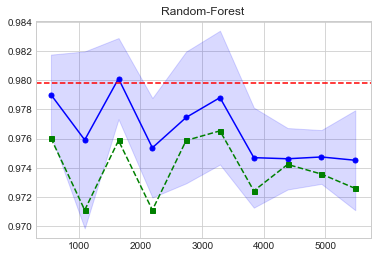

In [62]:
learn_curve_plot(name = 'Random-Forest', 
                 model = rfc, 
                 xtrain = X_train, 
                 ytrain= y_train,
                ytest = y_test,
                xtest = X_test)

In [25]:
# confusion matrix for random forest
confusion_matrix(y_test, y_pred)

array([[1024,   16],
       [  25,  966]], dtype=int64)

In [30]:
# 4 useful features
new_features = pd.Series(rfc.feature_importances_, index = list(X_test)).sort_values(ascending= False)[:4]

In [31]:
new_features

spore-print-color           0.153566
gill size                   0.112654
stalk-surface-below-ring    0.097990
population                  0.079538
dtype: float64

In [33]:
list(new_features.index)

['spore-print-color', 'gill size', 'stalk-surface-below-ring', 'population']

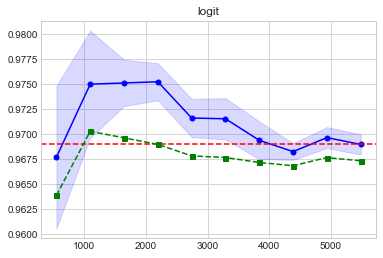

In [63]:
learn_curve_plot(name = 'logit', 
                 model = lgm, 
                 xtrain = X_train, 
                 ytrain= y_train,
                ytest = y_test,
                xtest = X_test)

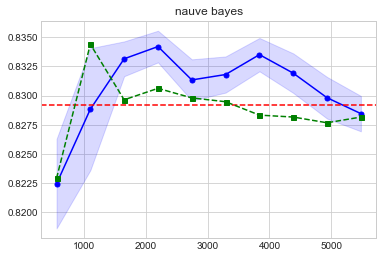

In [64]:
learn_curve_plot(name = 'nauve bayes', 
                 model = nbc, 
                 xtrain = X_train, 
                 ytrain= y_train,
                ytest = y_test,
                xtest = X_test)

In [55]:
nbc.score(X_test, y_test)

0.8291482028557361

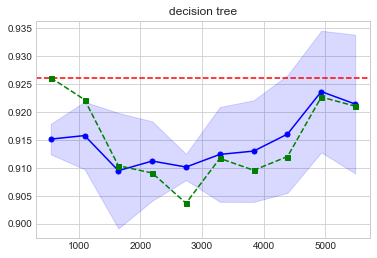

In [65]:
learn_curve_plot(name = 'decision tree', 
                 model = dtc, 
                 xtrain = X_train, 
                 ytrain= y_train,
                ytest = y_test,
                xtest = X_test)

In [53]:
data3 = pd.concat([data2['class'], data2[list(new_features.index)]], axis =1)

In [42]:
data3.head()

,class,spore-print-color,gill size,stalk-surface-below-ring,population
0,poisonous,black,narrow,smooth,scattered
1,edible,brown,broad,smooth,numerous
2,edible,brown,broad,smooth,numerous
3,poisonous,black,narrow,smooth,scattered
4,edible,brown,broad,smooth,abundant


In [69]:
# transformers
le = LabelEncoder()
oe = OrdinalEncoder()
sc = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)

X1, y1 = data3.iloc[:, 1:], data3.iloc[:, 0]
y1 = le.fit_transform(y1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state = 12)

transformers = ColumnTransformer([('ohe', ohe, list(X1))], remainder='drop')
pipe2 = Pipeline([('transformer', transformers),
                 ('clf', lgm)])

In [70]:
# fitting the new features with Logistics regression
pipe2.fit(X_train1, y_train1)

Pipeline(memory=None,
     steps=[('transformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('ohe', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=Non...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [72]:
le.inverse_transform(pipe2.predict(X_test1))

array(['edible', 'edible', 'poisonous', ..., 'edible', 'edible',
       'poisonous'], dtype=object)

In [87]:
pipe2.predict(X_test1)

array([0, 0, 1, ..., 0, 0, 1])

In [75]:
# We hen save everything (final model)
from sklearn.externals import joblib

joblib.dump(pipe2,'output/model.pkl')

['output/model.pkl']

In [84]:
# predict new instance...
new_instance = ['brown', 'broad', 'smooth', 'scattered']
new = pd.DataFrame(new_instance, index=list(X_test1)).T

le.inverse_transform(pipe2.predict(new))

array(['edible'], dtype=object)

In [85]:

for i in list(X_test1):
    print(X_test1[i].unique())

['brown' 'black' 'chocolate' 'white' 'purple' 'yellow' 'buff' 'green'
 'orange']
['broad' 'narrow']
['smooth' 'silky' 'fibrous' 'scaly']
['scattered' 'several' 'numerous' 'abundant' 'solitary' 'clustered']


In [86]:
list(X_test1)

['spore-print-color', 'gill size', 'stalk-surface-below-ring', 'population']